(60000, 784)
(10000, 784)
Epoch 1/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0924
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0580
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0550
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0507
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0491
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0476
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0464
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0455
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0449
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0446
Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0437
Epoch 12/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0432

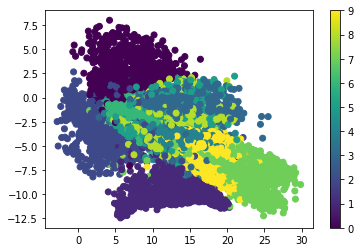

In [4]:
import numpy as np
np.random.seed(1337) 
import tensorflow as tf
tf.compat.v1.set_random_seed(7)
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )

(x_train, _), (x_test, y_test) = mnist.load_data()

# data pre-processing
x_train = x_train.astype('float32') / 255. - 0.5       # minmax_normalized
x_test = x_test.astype('float32') / 255. - 0.5         # minmax_normalized
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)
"""
(60000, 784)
(10000, 784)
"""
# in order to plot in a 2D figure
encoding_dim = 2

# this is our input placeholder
input_img = Input(shape=(784,))

# Comprima los datos de 28 × 28 = 784 dimensiones de datasets.mnist data en datos bidimensionales 
# y luego visualice el efecto de clasificación en un espacio bidimensional.

# encoder layers
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

# decoder layers
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

# construct the autoencoder model
autoencoder = Model(input_img, decoded)
# construct the encoder model for plotting
encoder = Model(input_img, encoder_output)
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# training
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True)

# plotting
encoded_imgs = encoder.predict(x_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.colorbar()
plt.show()